In [1]:
import tensorflow as tf

train_data_path = "./data/train"
validation_data_path = "./data/test"

2025-11-10 14:27:34.719057: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-10 14:27:34.816226: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-10 14:27:38.200441: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
import tensorflow as tf

train_data_path = "./data/train"
validation_data_path = "./data/test"

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_data_path,
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(48,48),
    shuffle=True,
    seed=42,
    subset='training',
    validation_split=0.2,
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
  directory= validation_data_path,
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(48, 48),
    shuffle=True,
    seed=42,
    subset='validation',
    validation_split=0.2,
)

Found 28709 files belonging to 7 classes.
Using 22968 files for training.


2025-11-10 14:27:44.162904: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-11-10 14:27:44.163206: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:171] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-11-10 14:27:44.163215: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:176] retrieving CUDA diagnostic information for host: hassan
2025-11-10 14:27:44.163219: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] hostname: hassan
2025-11-10 14:27:44.163392: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] libcuda reported version is: 570.195.3
2025-11-10 14:27:44.163412: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:194] kernel reported version is: 570.195.3
2025-11

Found 7178 files belonging to 7 classes.
Using 1435 files for validation.


In [3]:
class_names = train_ds.class_names
class_names

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [4]:
images, labels = next(iter(train_ds))
print("Labels Shape:", labels.shape)
print("First few labels:", labels[:10].numpy())

Labels Shape: (32, 7)
First few labels: [[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


In [5]:
len(train_ds)

718

In [6]:
len(validation_ds)

45

2025-11-10 14:29:37.572977: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


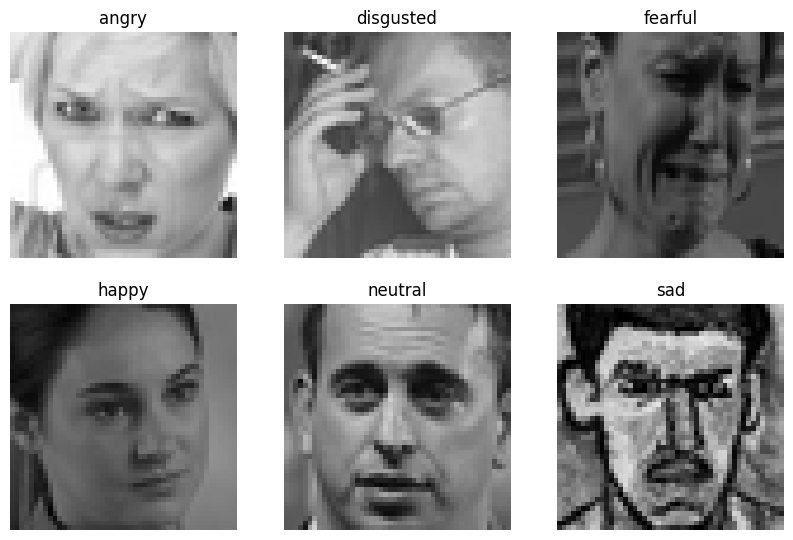

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")

In [10]:
print(train_ds.class_names)
len(train_ds.class_names)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


7

In [11]:
for image_batch, label_batch in validation_ds.take(1):
  print(image_batch.shape)
  print(label_batch.shape)


(32, 48, 48, 3)
(32, 7)


2025-11-10 14:29:47.823184: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [13]:
from tensorflow.keras import layers, models

modelCNN = models.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(24, 24, 3)),  # Image normalization
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D((2,2)),

  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(32, activation='relu'),
  layers.Dense(7, activation='softmax')
])

modelCNN.summary()

/home/hassan/Desktop/project/simplon/facial-emotional-detection/venv/lib/python3.11/site-packages/keras/src/layers/preprocessing/data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 24, 24, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 22, 22, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 22, 22, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 9, 9, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,711 (409.03 KB)

 Trainable params: 104,263 (407.28 KB)

 Non-trainable params: 448 (1.75 KB)

In [14]:
from tensorflow.keras.optimizers import Adam

modelCNN.compile(optimizer="adam",
                 loss="categorical_crossentropy",
                 metrics=["accuracy"])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
    )

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor
    factor=0.5,          # Reduce LR by this factor
    patience=3,          # Number of epochs with no improvement
    verbose=1,           # Print out messages when reducing LR
    min_lr=1e-6          # Minimum learning rate
)

In [16]:
modelCNN.fit(
  train_ds,
  validation_data=validation_ds,
  epochs= 20,
  callbacks=[reduce_lr, early_stopping]
)

Epoch 1/20


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 128, but received input with shape (None, 2048)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 48, 48, 3), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
modelCNN.save('emotion_face_detection.keras')